First thing: check that this is running on the right computer:

In [2]:
import socket
assert socket.gethostname() == "lcs098116"

In [3]:
from pathlib import Path
base_path = Path('/media/storage/jim/speech-syn/Corpora')

Some imports for later:

In [4]:
from pydub import AudioSegment
import numpy as np
import datetime
import pandas as pd

In [5]:
df = pd.DataFrame(columns=["name", "seconds", "hms"])
df_cnt = 0

In [6]:
def sum_path_by_type(path, pattern):
    acc = []
    for audio in path.glob(pattern):
        audio = AudioSegment.from_file(str(audio))
        acc.append(audio.duration_seconds)
    return np.sum(acc)

In [8]:
MU = base_path / "ga_MU"
UL = base_path / "ga_UL"

In [9]:
paths = [
    MU / "scealaiocht_amhlaoibh" / "orig_mp3",
    MU / "peig" / "text_0001" / "wav",
    MU / "mo_sgeal_fein_CORK" / "mp3",
    MU / "mo_sgeal_fein_CORK" / "wav",
    MU / "cmg" / "CMGCorpusBeag" / "wav16_trimmed",
    MU / "cmg" / "CMGOther" / "wav16_trimmed",
    MU / "nnc" / "CDAlphabet" / "ogg",
    MU / "nnc" / "CDAn_tOileanach_part1_newLTS" / "ogg",
    MU / "nnc" / "CDAn_tOileanach_part2_newLTS" / "ogg",
    MU / "nnc" / "CDAn_tOileanach_part3_newLTS" / "ogg",
    MU / "nnc" / "CDAn_tOileanach_part4_newLTS" / "ogg",
    MU / "nnc" / "CDNamedEntities01" / "ogg",
    MU / "nnc" / "CDNamedEntities02" / "ogg",
    MU / "nnc" / "CDSaytime" / "ogg",
    MU / "nnc" / "corpas_beag_newLTS" / "ogg",
]
short_paths = [
    "scealaiocht_amhlaoibh",
    "peig",
    "mo_sgeal_fein MP3",
    "mo_sgeal_fein wav",
    "CMGCorpusBeag",
    "CMGOther",
    "CDAlphabet",
    "CDAn_tOileanach_part1_newLTS",
    "CDAn_tOileanach_part2_newLTS",
    "CDAn_tOileanach_part3_newLTS",
    "CDAn_tOileanach_part4_newLTS",
    "CDNamedEntities01",
    "CDNamedEntities02",
    "CDSaytime",
    "corpas_beag_newLTS",    
]
globs = [
    "*.mp3",
    "bbc*.wav",
    "*.mp3",
    "*.wav",
    "*.wav",
    "*.wav",
    "*.ogg",
    "*.ogg",
    "*.ogg",
    "*.ogg",
    "*.ogg",
    "*.ogg",
    "*.ogg",
    "*.ogg",
    "*.ogg",
]

In [10]:
totals = [sum_path_by_type(p, e) for (p, e) in zip(paths, globs)]

In [12]:
totals

[17184.90658106576,
 207.79999999999998,
 23484.18612244898,
 3713.3583673469384,
 4876.356687500001,
 1728.5821875000001,
 133.71200000000002,
 8800.344000000001,
 8588.216,
 9636.352,
 6902.088,
 542.9680000000001,
 1024.6,
 230.73599999999996,
 4648.536]

In [ ]:
totals = {}
for subdir in paths:
    dirname = relevant_paths[str(subdir)]
    totals[dirname] = sum_path_by_type(subdir, "*.ogg")

In [14]:
totals_disp = {a: b for (a, b) in zip(short_paths, totals)}

In [15]:
totals_hms = {a: str(datetime.timedelta(seconds=b)) for (a, b) in totals_disp.items()}

In [16]:
for dir in totals_hms.keys():
    print(f"{dir}: {totals_disp[dir]} seconds ({totals_hms[dir]})")

scealaiocht_amhlaoibh: 17184.90658106576 seconds (4:46:24.906581)
peig: 207.79999999999998 seconds (0:03:27.800000)
mo_sgeal_fein MP3: 23484.18612244898 seconds (6:31:24.186122)
mo_sgeal_fein wav: 3713.3583673469384 seconds (1:01:53.358367)
CMGCorpusBeag: 4876.356687500001 seconds (1:21:16.356688)
CMGOther: 1728.5821875000001 seconds (0:28:48.582188)
CDAlphabet: 133.71200000000002 seconds (0:02:13.712000)
CDAn_tOileanach_part1_newLTS: 8800.344000000001 seconds (2:26:40.344000)
CDAn_tOileanach_part2_newLTS: 8588.216 seconds (2:23:08.216000)
CDAn_tOileanach_part3_newLTS: 9636.352 seconds (2:40:36.352000)
CDAn_tOileanach_part4_newLTS: 6902.088 seconds (1:55:02.088000)
CDNamedEntities01: 542.9680000000001 seconds (0:09:02.968000)
CDNamedEntities02: 1024.6 seconds (0:17:04.600000)
CDSaytime: 230.73599999999996 seconds (0:03:50.736000)
corpas_beag_newLTS: 4648.536 seconds (1:17:28.536000)


In [18]:
for scdir in totals_hms.keys():
    df.loc[df_cnt] = [f"{scdir}", totals_disp[scdir], totals_hms[scdir]]
    df_cnt += 1

In [19]:
df.to_csv("mu_tts.csv")

In [20]:
from IPython.display import display, HTML
display(HTML(df.to_html()))

,name,seconds,hms
0,scealaiocht_amhlaoibh,17184.906581,4:46:24.906581
1,peig,207.800000,0:03:27.800000
2,mo_sgeal_fein MP3,23484.186122,6:31:24.186122
3,mo_sgeal_fein wav,3713.358367,1:01:53.358367
4,CMGCorpusBeag,4876.356688,1:21:16.356688
5,CMGOther,1728.582188,0:28:48.582188
6,CDAlphabet,133.712000,0:02:13.712000
7,CDAn_tOileanach_part1_newLTS,8800.344000,2:26:40.344000
8,CDAn_tOileanach_part2_newLTS,8588.216000,2:23:08.216000
9,CDAn_tOileanach_part3_newLTS,9636.352000,2:40:36.352000


In [21]:
total_all = np.sum(df['seconds'])
total_all_hms = str(datetime.timedelta(seconds=total_all))
print(f'Total: {total_all} ({total_all_hms})')

Total: 91702.7419458617 (1 day, 1:28:22.741946)


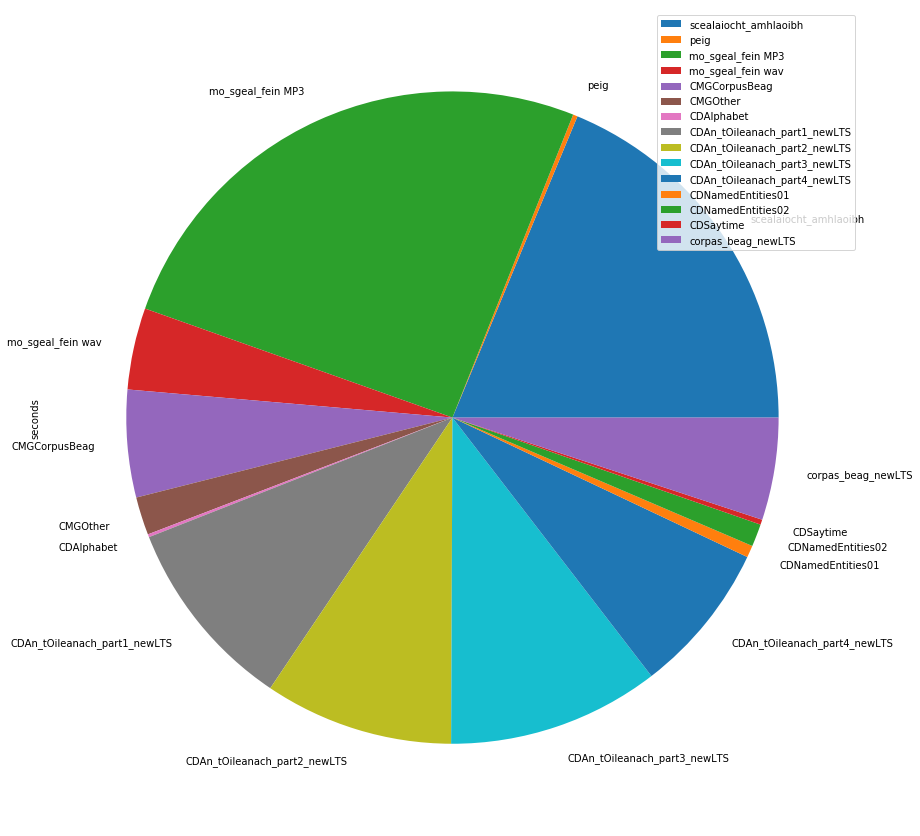

In [36]:
%matplotlib inline

import matplotlib
copy = df.set_index('name')
plot = copy.plot.pie(y='seconds', figsize=(20, 15))

In [37]:
totals_hms_text = [f'{a}: {b}' for (a, b) in totals_hms.items()]

In [40]:
totals_hms_text

['scealaiocht_amhlaoibh: 4:46:24.906581',
 'peig: 0:03:27.800000',
 'mo_sgeal_fein MP3: 6:31:24.186122',
 'mo_sgeal_fein wav: 1:01:53.358367',
 'CMGCorpusBeag: 1:21:16.356688',
 'CMGOther: 0:28:48.582188',
 'CDAlphabet: 0:02:13.712000',
 'CDAn_tOileanach_part1_newLTS: 2:26:40.344000',
 'CDAn_tOileanach_part2_newLTS: 2:23:08.216000',
 'CDAn_tOileanach_part3_newLTS: 2:40:36.352000',
 'CDAn_tOileanach_part4_newLTS: 1:55:02.088000',
 'CDNamedEntities01: 0:09:02.968000',
 'CDNamedEntities02: 0:17:04.600000',
 'CDSaytime: 0:03:50.736000',
 'corpas_beag_newLTS: 1:17:28.536000']